## scikit-learn中的逻辑回归

In [12]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array((X[:,0]**2+X[:,1])<1.5, dtype='int')
for _ in range(20):
    y[np.random.randint(200)] = 1 # 挑一些样本强行变为1，添加噪音

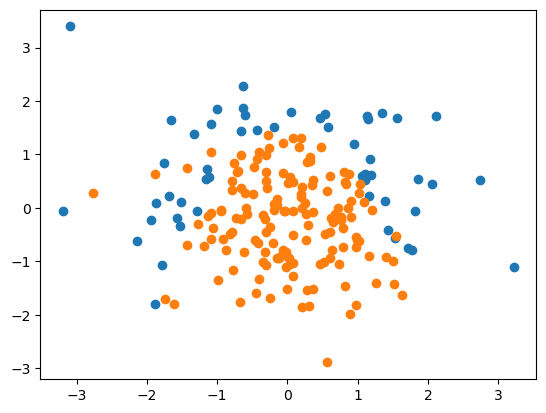

In [13]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

### 使用scikit-learn中的逻辑回归

In [15]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [16]:
log_reg.score(X_train, y_train)

0.7933333333333333

In [17]:
log_reg.score(X_test, y_test)

0.86

In [18]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

C:\Users\Beza\AppData\Local\Temp\ipykernel_8476\2833637709.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


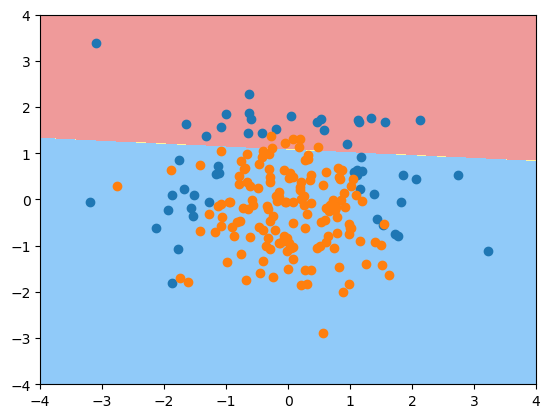

In [19]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

In [21]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [22]:
poly_log_reg.score(X_train, y_train)

0.9066666666666666

In [23]:
poly_log_reg.score(X_test, y_test)

0.94

C:\Users\Beza\AppData\Local\Temp\ipykernel_8476\2833637709.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


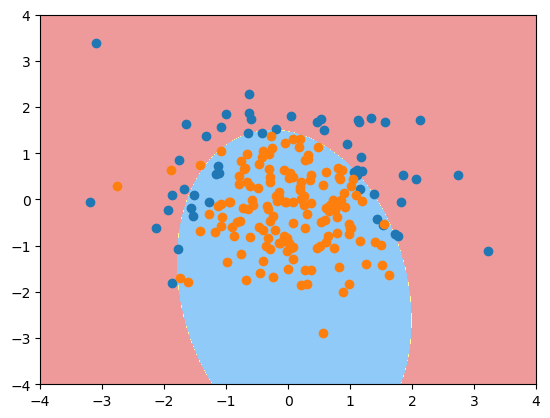

In [24]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [25]:
poly_log_reg2 = PolynomialLogisticRegression(degree=20)
poly_log_reg2.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [26]:
poly_log_reg2.score(X_train, y_train)

0.94

In [27]:
poly_log_reg2.score(X_test, y_test)

0.92

C:\Users\Beza\AppData\Local\Temp\ipykernel_8476\2833637709.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


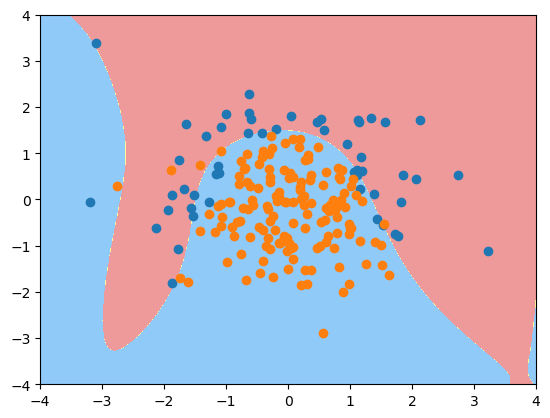

In [28]:
plot_decision_boundary(poly_log_reg2, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [29]:
def PolynomialLogisticRegression(degree, C): # C：默认是1.0，正则化参数
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C))
    ])

poly_log_reg3 = PolynomialLogisticRegression(degree=20, C=0.1)
poly_log_reg3.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression(C=0.1))])

In [30]:
poly_log_reg3.score(X_train, y_train)

0.84

In [31]:
poly_log_reg3.score(X_test, y_test)

0.92

C:\Users\Beza\AppData\Local\Temp\ipykernel_8476\2833637709.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


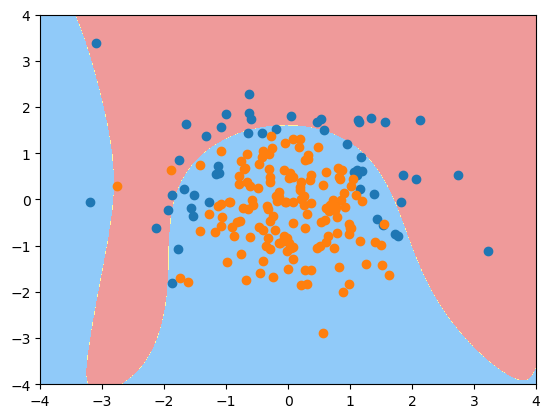

In [32]:
plot_decision_boundary(poly_log_reg3, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

C:\Users\Beza\AppData\Local\Temp\ipykernel_8476\2833637709.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


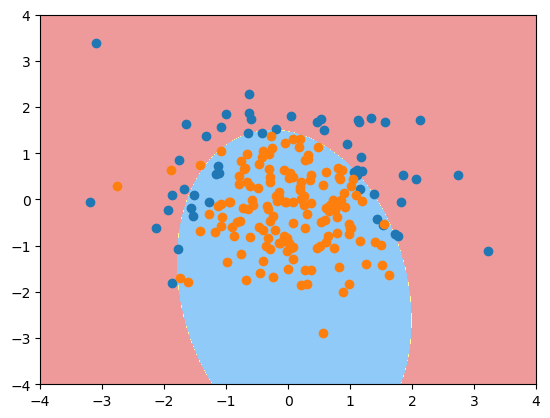

In [44]:
def PolynomialLogisticRegression(degree, C, penalty, solver): 
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C, penalty=penalty,solver=solver))
    ])
 
 
poly_log_reg4 = PolynomialLogisticRegression(degree=20, C=0.1, penalty='l1',solver='liblinear')  #传入正则化项C，选择l1正则化，求解器为liblinear
poly_log_reg4.fit(X_train, y_train)
 
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [45]:
def PolynomialLogisticRegression(degree, C, penalty='l2'): # penalty：默认为'l2'，默认正则化方式为l2正则化，还有l1正则化。
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C, penalty=penalty))
    ])


## 使用L1正则项

In [47]:
def PolynomialLogisticRegression(degree, C, penalty, solver): 
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C, penalty=penalty,solver=solver))
    ])
# poly_log_reg4 = PolynomialLogisticRegression(degree=20, C=0.1, penalty='l2')
poly_log_reg5 = PolynomialLogisticRegression(degree=20, C=0.1, penalty='l1',solver='liblinear') 
poly_log_reg5.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))])

In [48]:
poly_log_reg5.score(X_train, y_train)

0.8266666666666667

In [49]:
poly_log_reg5.score(X_test, y_test)

0.9

C:\Users\Beza\AppData\Local\Temp\ipykernel_8476\2833637709.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


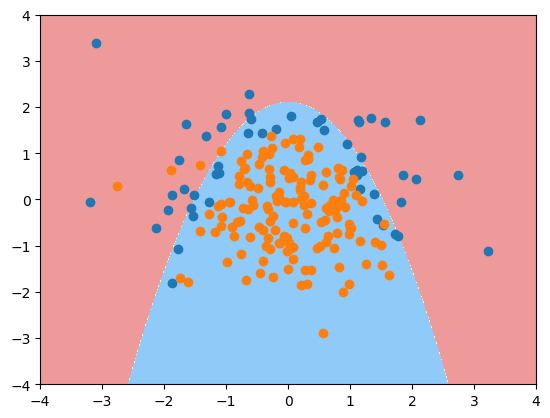

In [50]:
plot_decision_boundary(poly_log_reg4, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()